

# Project: No Show Doctors Appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset analysed in this notebook contains information from 100k medical appointments in Brazil. This dataset will be used to answer the following questions:

How does the age of the patient affect whether they are no-shows? Does the gender of the patient affect whether they show up to their medical appointment or not? 
Does the welfare status of the patient affect whether they show up to their medical appointment or not?
Does whether the patient received an sms affect whether they show up to their medical appointment?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# How many rows and columns are in the dataset

df.shape

(110527, 14)

In [4]:
# Find the number of rows with missing values in the dataset

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [5]:
# Check the datatypes of the columns in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are 110527 rows and 14 columns in this dataset with no missing values and all of the datatypes are appropriate.

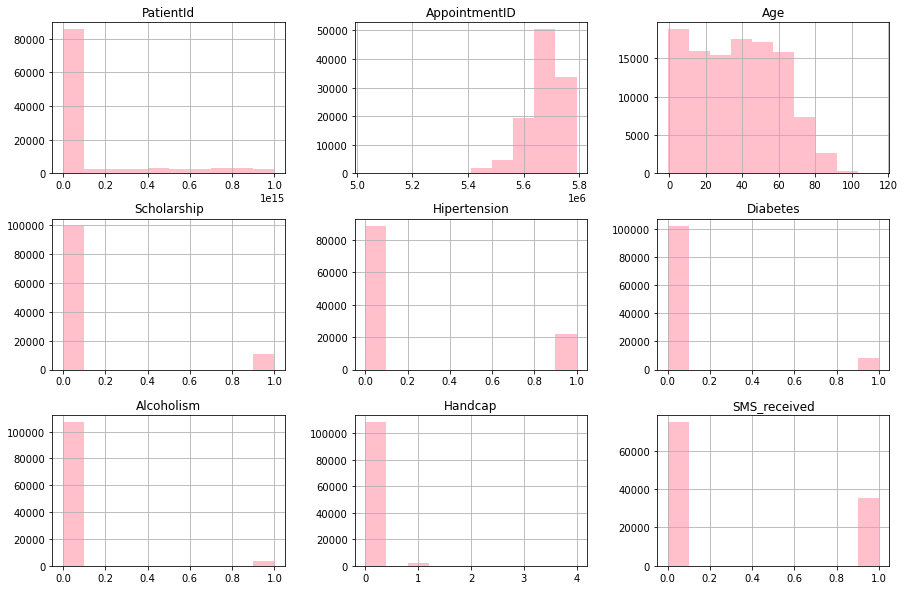

In [6]:
# Create histogram of numerical data

df.hist(figsize=(15,10), color='pink');

Looking at the histograms above, the data that stands out is that of the age of the patients. The data seems to be skewed to the right indicating most of the patients are younger than 60 years old. 



### Data Cleaning 

In [7]:
"""Removing the columns I won't be using for my analysis."""

df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,0,No
1,M,56,JARDIM DA PENHA,0,0,No
2,F,62,MATA DA PRAIA,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,No
4,F,56,JARDIM DA PENHA,0,0,No


In [8]:
# rename the columns to make things easier when writing code

df.rename(columns = {'Gender': 'gender', 'Age':'age', 'Neighbourhood':'neighbourhood', 'Scholarship':'scholarship',
                    'SMS_received':'sms_received', 'No-show':'no_show'}, inplace = True)

df.head()

,gender,age,neighbourhood,scholarship,sms_received,no_show
0,F,62,JARDIM DA PENHA,0,0,No
1,M,56,JARDIM DA PENHA,0,0,No
2,F,62,MATA DA PRAIA,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,No
4,F,56,JARDIM DA PENHA,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis



### How does Age Impact whether a patient shows up to their appointment?

<AxesSubplot:>

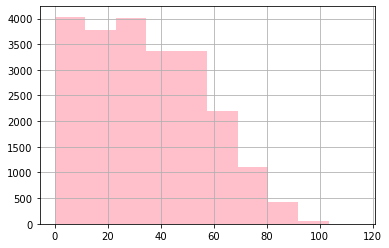

In [9]:
# Patients who did not show up to their appointment

df.query("no_show == 'Yes'")['age'].hist(bins=10, color='pink')

<AxesSubplot:>

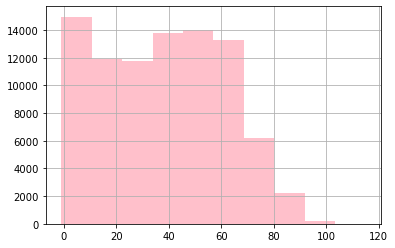

In [10]:
# Patients who showed up to their appointments

df.query("no_show == 'No'")['age'].hist(bins=10, color='pink')

The histograms above show the age distribution of the patients with the first histogram being the patients who did not show up for the appointments and the second histogram being the patients who showed up for their appointments. The first graph is slightly more skewed to the right than the second indicating that it is more common for patients of a younger age to not show up to their appointments while the older patients are more likely to show up.

### Does Gender have an impact on whether a patient shows up to their appointment?

In [11]:
# Grouping the gender and no-show column according to gender

df_gender = df.groupby(['gender', 'no_show'])['no_show'].count()

df_gender.head()

gender  no_show
F       No         57246
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show, dtype: int64

In [12]:
# Creat bar plot function to plot bar graphs using pandas and matplotlib

def plot_function(dataframe, title, ylabel, xlabel):
    
    plt.figure(figsize = (23,6))
    
    dataframe.plot(kind='bar', color = 'pink')
    
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize =20)
    plt.xticks(rotation = 0, fontsize=15)
    
    plt.show()

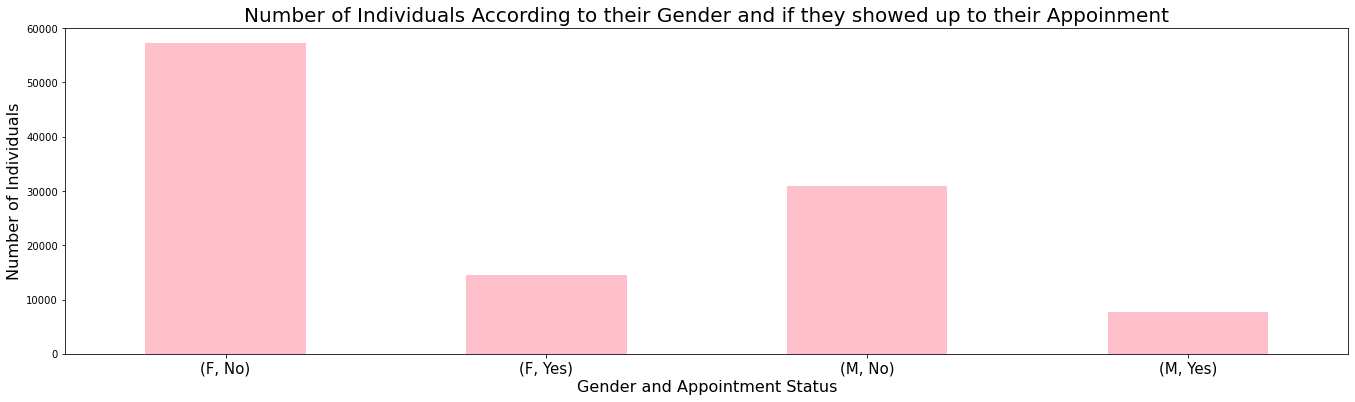

In [13]:
# BarPlot of Gender versus no-show 

plot_function(df_gender, title= 'Number of Individuals According to their Gender and if they showed up to their Appoinment',
             ylabel = 'Number of Individuals', xlabel ='Gender and Appointment Status')

The bar graph above displays the number of individuals according to their gender and whether they showed up for their scheduled medical appointment. The data shows that majority women show up for their medical appointments while a smaller amount of women do not show up for their appointments. Women still however take up majority of the number of individuals who do not show up for their medical appointments. Below we I will plot a histogram to display the number of females and males to check if this trend may be because there is a larger number of females in this dataset than there are males.

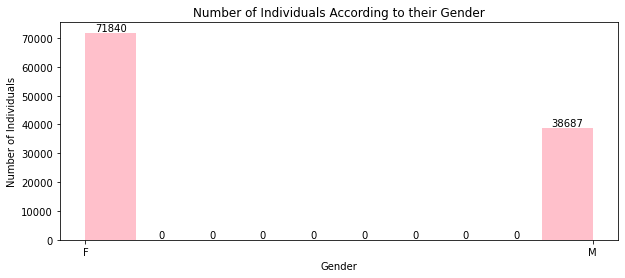

In [14]:
#Create histogram of for Gender

fig = plt.figure(figsize = (10,4))

values, bins, bars =plt.hist(x='gender',data=df, color = 'pink')

plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.title('Number of Individuals According to their Gender')
plt.xticks(rotation = 0)
plt.bar_label(bars)
plt.show()

The histogram above shows that there definitely is a larger number of females than males with females equaling 71840 people and males only 38687. This could explain how females were able to make up majority of the individuals who attended their medical appointments and majority of individuals who did not.By the looks of it, gender does not play a large role in whether an individual shows up to their medical appointment.

### Does the welfare status have an Impact on whether an individual shows up for their Appointment?

In [15]:
# How many individuals are enrolled in welfare and how many are not

df['scholarship'].value_counts()

0    99666
1    10861
Name: scholarship, dtype: int64

<AxesSubplot:>

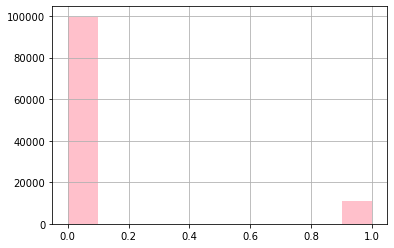

In [16]:
df['scholarship'].hist(color='pink')

Looking at the data welfare numbers above, there is a much larger number of individuals who are not enrolled in welfare. This uneven distribution could impact our analysis as there are very few people enrolled in the welfare program in this dataset.

In [17]:
# Grouping the scholarship and no-show column according to gender

df_schl = df.groupby(['scholarship', 'no_show'])['no_show'].count()

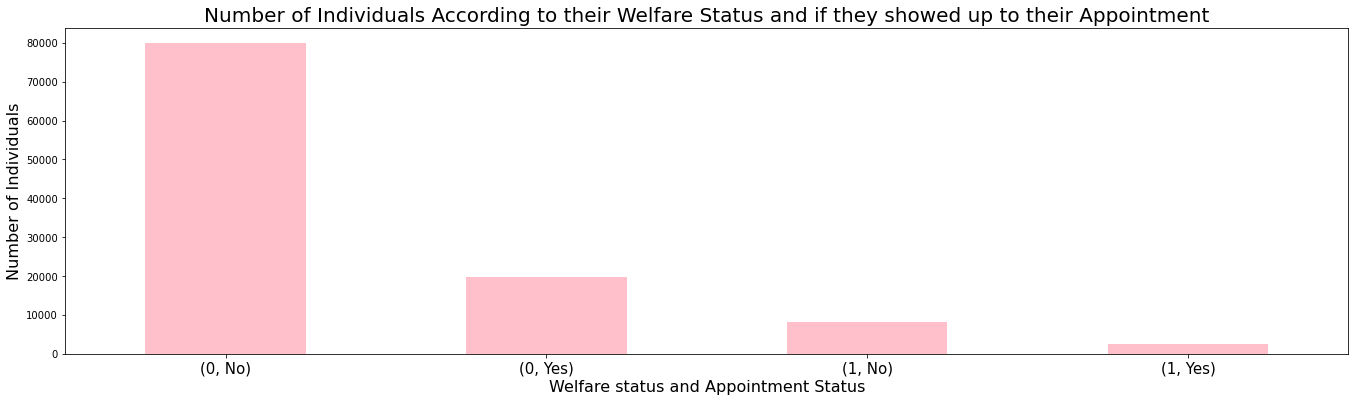

In [18]:
# BarPlot of scholarship versus no-show 


plot_function(df_schl, title= 'Number of Individuals According to their Welfare Status and if they showed up to their Appointment',
             ylabel = 'Number of Individuals', xlabel ='Welfare status and Appointment Status')

In [19]:
# Producing head view of data above

df_schl.head()

scholarship  no_show
0            No         79925
             Yes        19741
1            No          8283
             Yes         2578
Name: no_show, dtype: int64

The graph above shows the number of individuals based on their walfare status( i.e. are they enrolled in Brasilian welfare program) and whether they showed up for their medical appointments. 
From this graph it is evident that majority of those who attended their appointments are not enrolled in the welfare program.While it seems that approximately one quarter of the individuals who are enrolled in walfare fail to attend their medical appointments.

### Does whether the sms was received have an Impact on whether an individual shows up for their Appointment?

In [20]:
# How many individuals received their sms

df['sms_received'].value_counts()

0    75045
1    35482
Name: sms_received, dtype: int64

In [21]:
# Grouping the sms received and no-show column according to gender


df_sms = df.groupby(['sms_received', 'no_show'])['no_show'].count()
df_sms.head()

sms_received  no_show
0             No         62510
              Yes        12535
1             No         25698
              Yes         9784
Name: no_show, dtype: int64

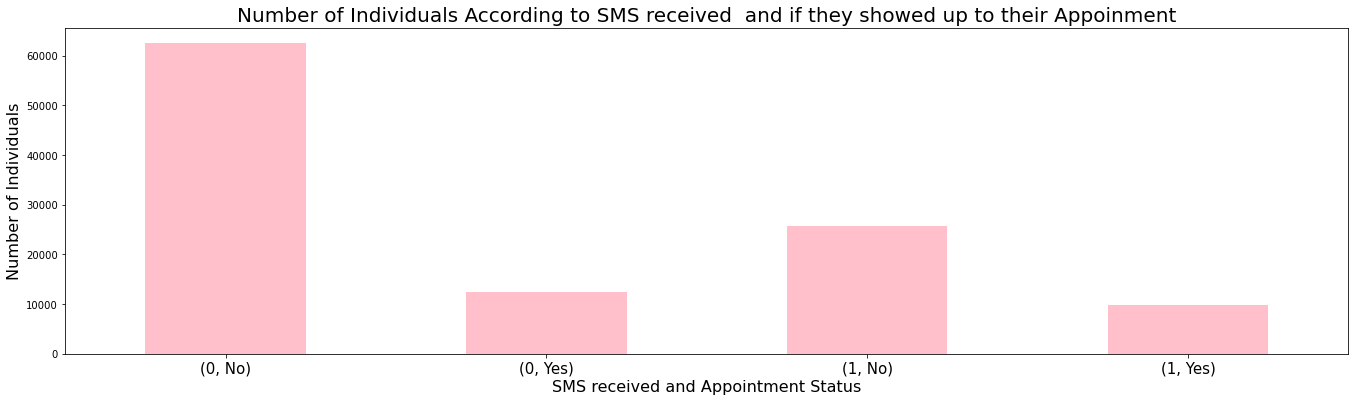

In [22]:
# Barplot of sms-received versus no-show

plot_function(df_sms, title= 'Number of Individuals According to SMS received  and if they showed up to their Appoinment',
             ylabel = 'Number of Individuals', xlabel ='SMS received and Appointment Status')

The graph above shows the number of individuals based on whether they received their sms and whether they showed up for their medical appointments. 
From this graph is it evident that majority of those who attended their appointments did not receive the sms. From this data we can conclude that the sms does not have a significant impact on whether someone shows up to their medical appointment.

<a id='conclusions'></a>
## Conclusions

Based on the analysis performed above no clear correlation between the three factors, i.e. Gender, Welfare status and sms received and our dependent variable could be seen. Altough collectively they might play a role in why a patient doesn't show up to their appointment, individually they show very little evidence of that. Age shows some evidence of impacting the no_show variable with younger people being more likely to be no-show's compared to the older patients.

The uneven distribution of features makes it difficult to determine how and if these factors affects whether a patient shows up for an appointment.Therefore a dataset with an even number of individuals who are enrolled in the welfare program and those who are not might be able to display how this status affects the no_show variable. The same can be said for gender with the males making less than half of the individuals in the dataset.

## References

Matplotlib bar plot : https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

Issues with data and analyses: Errors, underlying themes, and potential solutions: https://www.pnas.org/doi/10.1073/pnas.1708279115